# 一元一次方程式 regression

## 基本結構:<br/>創造模擬data、input data（可以是實際data的部分）、各項起始參數(Weights, biases)、猜測目標函數形式、計算loss大小、優化方式（降低梯度減少loss）</br> sess激活init</br> for迴圈實作次數</br>

In [7]:
import tensorflow as tf
import numpy as np

#create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

#create tensorflow structure start
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))  #從-1到1隨機出數字
biases = tf.Variable(tf.zeros([1]))  #初始值定義成0

y = Weights*(x_data) + biases

loss = tf.reduce_mean(tf.square(y-y_data)) #最小平方差法
optimizer = tf.train.GradientDescentOptimizer(0.5) #把GradientDescent降到最低，0.5是學習效率，通常<1
train = optimizer.minimize(loss) #把loss降到最低

#以上兩個可以寫成一行字： train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

init = tf.global_variables_initializer() #初始化整個結構，才可以開始活動

#create tensorflow structure end
sess = tf.Session() #創建指標
sess.run(init) #先激活我的init

for step in range(201): #訓練200次
    sess.run(train) #後來指向我的train
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [ 0.25180519] [ 0.29948443]
20 [ 0.13223948] [ 0.28267112]
40 [ 0.1088089] [ 0.2952652]
60 [ 0.10240687] [ 0.29870629]
80 [ 0.10065764] [ 0.29964653]
100 [ 0.10017969] [ 0.29990342]
120 [ 0.10004911] [ 0.29997361]
140 [ 0.10001343] [ 0.2999928]
160 [ 0.10000365] [ 0.29999804]
180 [ 0.10000099] [ 0.29999948]
200 [ 0.10000029] [ 0.29999986]


2017版本寫法

In [41]:
import tensorflow as tf
import numpy as np

#create data
x_data = np.random.rand(1000).astype(np.float32)
y_data = x_data*0.1 + 0.3

#create tensorflow structure start
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))  #從-1到1隨機出數字
biases = tf.Variable(tf.zeros([1]))  #初始值定義成0

y = Weights*(x_data) + biases

loss = tf.losses.mean_squared_error(y_data, y) #如何度量精準度
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss) #訓練精準

#create tensorflow structure end
sess = tf.Session() #創建指標
sess.run(tf.global_variables_initializer()) #先激活我的init

for step in range(201): #訓練200次
    sess.run(train_step) #後來指向我的train
    if step % 20 == 0:
        print(sess.run(train_step), sess.run(Weights), sess.run(biases))

None [-0.12789011] [ 0.38303819]
None [ 0.05312916] [ 0.32489255]
None [ 0.08964481] [ 0.30549952]
None [ 0.09771223] [ 0.30121502]
None [ 0.09949455] [ 0.30026844]
None [ 0.09988833] [ 0.30005932]
None [ 0.09997534] [ 0.30001312]
None [ 0.09999456] [ 0.3000029]
None [ 0.09999879] [ 0.30000067]
None [ 0.09999974] [ 0.30000016]
None [ 0.0999999] [ 0.30000007]


# session會話控制: sess.run()

In [8]:
import tensorflow as tf

matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                       [2]])

product = tf.matmul(matrix1, matrix2) #矩陣相乘，np.dot(m1,m2)

#method1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close() #要close

#method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2) #with的寫法後面不用close

[[12]]


# Variables 變量: 一定要定義＋初始化＋使用sess指針

In [13]:
import tensorflow as tf

#一定要定義變量
state = tf.Variable(0, name='counter')
#print(state.name)
one = tf.constant(1)

# new_value = state + one
new_value = tf.add(state, one) 

# state = new_value 指定
update = tf.assign(state, new_value) #動作

#如果有定義，一定要變量初始化整個變量，才可以開始活動
init = tf.global_variables_initializer() 

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update) #動作
        print(sess.run(state))

counter_3:0
1
2
3


# Placeholder，run的時候綁定dict形式的資料

In [17]:
import tensorflow as tf

input1 = tf.placeholder(tf.float32) #給定type: float32，也可以給結構
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2) #乘法

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.], input2:[2.]}))

[ 14.]


# Activation function 激勵函數，在layer 2之後輸出前會經過激勵函數（非線性用）

# 添加層 def add_layer() 大咖：Weights, biases, Wx_plus_b，最後Activation func

## 2017 神經層 tf.layers.dense(inputs, units, activation function, name='layer名字')

In [ ]:
import tensorflow as tf

def add_layer(inputs, in_size, out_size, activation_function=None): #沒有act表示是線性函數
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) #矩陣名稱使用大寫，norm. dist. in行 out列的矩陣
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) #一維度的list
    Wx_plus_b = tf.matmul(input, Weights) + biases #目標
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

以下例子是層數：input、1層prediction的hidden layer、ouput

In [30]:
import tensorflow as tf
import numpy as np

def add_layer(inputs, in_size, out_size, activation_function=None): #default沒有act表示是線性函數
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) #矩陣名稱使用大寫，norm. dist. in行 out列的矩陣
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) #一維度的list
    Wx_plus_b = tf.matmul(inputs, Weights) + biases #目標
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

#創造資料
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

#Layers input
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
#L1中的1是input_size = input data的維度，10是output_size = hidden layers有10個神經元數目
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#Prediction的10是表示hidden layer有10個神經元輸入給他，output_size是1表示最後輸出一個維度的數據給我們
prediction = add_layer(l1, 10,1, activation_function=None) #AF=None表示線性函式

loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data-prediction), 
                                    reduction_indices=[1]))
#reduction_indices就是axis，axis=1是橫排，axis=0是直排

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #Learning rate

init = tf.global_variables_initializer() #初始化！！
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data , ys:y_data})
    if i % 50 == 0:
        print(sess.run(loss, feed_dict={xs:x_data , ys:y_data})) #看是否有進步
        #注意，只要想要調用Session裡的變數，一定都要指向Session才可以

0.258726
0.0101269
0.00777926
0.00658578
0.00532753
0.00440905
0.00375664
0.00331161
0.00305845
0.00288277
0.00275767
0.0026712
0.00259287
0.00254429
0.0025064
0.00247929
0.00246014
0.00244495
0.00243077
0.00241936


# 輸出結果視覺化 result visualization

0.665379
0.0263683
0.0106785
0.00839952
0.00737463
0.0066587
0.00617447
0.00584755
0.00559251
0.00537632
0.00517298
0.00497487
0.00477476
0.00454196
0.00429413
0.00404534
0.00384231
0.00366456
0.00351735
0.0033926


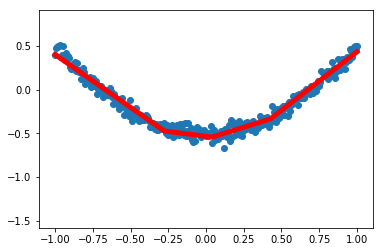

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None): #default沒有act表示是線性函數
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) #矩陣名稱使用大寫，norm. dist. in行 out列的矩陣
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) #一維度的list
    Wx_plus_b = tf.matmul(inputs, Weights) + biases #目標
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

#創造資料
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

#Layers
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10,1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data-prediction), 
                                    reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #Learning rate

init = tf.global_variables_initializer() #初始化！！
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_data,y_data)
plt.ion() #讓程式可以連續print不會暫停

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data})) #看是否有進步
        prediction_value = sess.run(prediction, feed_dict={xs:x_data , ys:y_data})
        #注意，只要想要調用Session裡的變數，一定都要指向Session才可以
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)

plt.show()

# Optimizer 優化器具

https://www.tensorflow.org/versions/r0.12/api_docs/python/train/

# Tensorboard：Flowchart繪製

0.282443
0.0124871
0.00750669
0.00547621
0.00457098
0.00413355
0.00389237
0.00372644
0.00360815
0.00350453
0.00342574
0.00336294
0.0033122
0.00327485
0.00323443
0.00319752
0.0031664
0.00313411
0.00310449
0.00307856


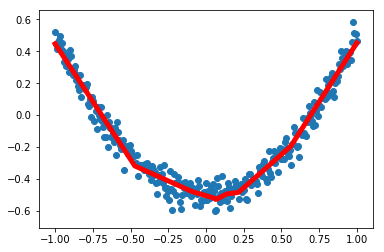

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None): #default沒有act表示是線性函數
    with tf.name_scope('layer'):
        with tf.name_scope('Weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W') 
            #矩陣名稱使用大寫，norm. dist. in行 out列的矩陣
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name = 'b') #一維度的list
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(inputs, Weights) + biases #目標
        
        #以下沒寫是因為系統會默認activation finction名稱
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

#創造資料
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

with tf.name_scope('layer'):
    xs = tf.placeholder(tf.float32, [None, 1], name = 'x_inputs')
    ys = tf.placeholder(tf.float32, [None, 1], name = 'y_inputs')

#Layers
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10,1, activation_function=None)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data-prediction), 
                                    reduction_indices=[1]))
with tf.name_scope("train"):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #Learning rate

init = tf.global_variables_initializer() #初始化！！
sess = tf.Session()
writer = tf.summary.FileWriter("Tensorflow dashboard/", sess.graph)
merge_op = tf.summary.merge_all()     

sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_data,y_data)
plt.ion() #讓程式可以連續print不會暫停

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data})) #看是否有進步
        prediction_value = sess.run(prediction, feed_dict={xs:x_data , ys:y_data})
        #注意，只要想要調用Session裡的變數，一定都要指向Session才可以
        writer.add_summary(result, step)
        
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
        
        

plt.show()

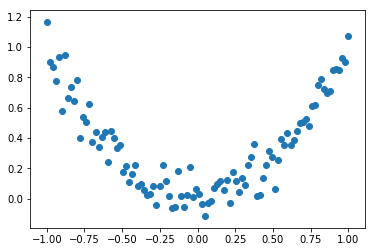

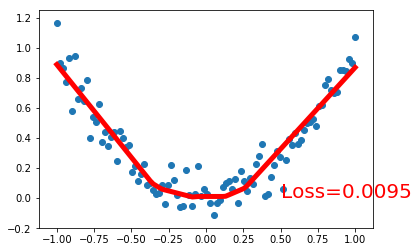

In [47]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# plot data
plt.scatter(x, y)
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 1)                     # output layer

loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # something about plotting

for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show() 
#

# 2017版Regression修訂簡化版，尤其神經層建構、調用Session內變數方法

## 創造模擬data和函式、feeding data/placeholder（可以取部分實際data）、各項起始參數(Weights, biases)、創建神經層結構（而不是去猜目標函式）、計算loss大小、優化方式（降低梯度減少loss）</br> sess激活init</br> for迴圈實作次數回傳loss減小幅度</br>

tf_x = tf.placeholder(tf.float32, x.shape, name='x')<br/>
l1 = tf.layers.dense(inputs, units, activation function, name='layer名字') 超簡單不用再自己造輪子囉<br/>
loss = tf.losses.mean_squared_error(tf_y, output, scope='loss') 有超多直接定義好可以套用<br/>
sess.run(tf.global_variables_initializer())<br/>
_, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})  #可以直接調用兩個變數，不然會寫很長

In [1]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data，創造數據
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

#接受feeding data的tf_x和tf_y
with tf.variable_scope('Inputs'):
    tf_x = tf.placeholder(tf.float32, x.shape, name='x') 
    tf_y = tf.placeholder(tf.float32, y.shape, name='y')

with tf.variable_scope('Net'):
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu, name='hidden_layer') #依序放上：inputs, units, activation function
    output = tf.layers.dense(l1, 1, name='output_layer')

    #神經層跟output用histogram觀看
    # add to histogram summary
    tf.summary.histogram('h_out', l1)
    tf.summary.histogram('pred', output)

#loss要使用scalar觀看
loss = tf.losses.mean_squared_error(tf_y, output, scope='loss')
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
tf.summary.scalar('loss', loss)     # add loss to scalar summary

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#寫入log檔案夾內
writer = tf.summary.FileWriter('Dropbox/programming/Python/Py_Practices/Machine Learning/log', sess.graph)     # write to file
#合併所有的圖片
merge_op = tf.summary.merge_all()                       # operation to merge all summary

for step in range(100):
    # train and net output
    _, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})  #可以直接調用兩個變數，不然會寫很長
    writer.add_summary(result, step)

# Lastly, in your terminal or CMD, type this :
# $ tensorboard --logdir path/to/log
# open you google chrome, type the link shown on your terminal or CMD. (something like this: http://localhost:6006)

#tensorboard --logdir 'Dropbox/programming/Python/Py_Practices/Machine Learning/log'

# Classification 分類學習，有限選項

MNIST 手寫辨識系統

In [46]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
import numpy as np

#數字1-10圖片
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

#定義神經層
def add_layer(inputs, in_size, out_size, activation_function=None): #default沒有act表示是線性函數
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) #矩陣名稱使用大寫，norm. dist. in行 out列的矩陣
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) #一維度的list
    Wx_plus_b = tf.matmul(inputs, Weights) + biases #目標
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1)) #看說y_pre的最大值是不是跟v_ys一樣
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #tf.cast: Casts a tensor to a new type.
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

#placeholder拿來裝feeding data，和output結果
xs = tf.placeholder(tf.float32, [None, 784]) #一張圖有28*28=784個像素點位
ys = tf.placeholder(tf.float32, [None, 10]) #0~9共10種數字結果

#add output layer
prediction = add_layer(xs, 784, 10, activation_function = tf.nn.softmax)

#loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))

#training
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

sess = tf.Session()
#important step!!
sess.run(tf.global_variables_initializer())  #init

for i in range(1000):
    #SGD:stochastic gradient descent一次取一部分train data學習而已
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels)) #這邊是test data做測試喔

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.134
0.6538
0.7528
0.7913
0.8139
0.8241
0.8312
0.8389
0.844
0.8516
0.8567
0.8596
0.8585
0.866
0.8681
0.8646
0.8676
0.8707
0.8753
0.8755


2017 Classifier寫法

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
import numpy as np

#數字1-10圖片
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1)) #看說y_pre的最大值是不是跟v_ys一樣
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #tf.cast: Casts a tensor to a new type.
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

#placeholder拿來裝feeding data，和output結果
xs = tf.placeholder(tf.float32, [None, 784]) #一張圖有28*28=784個像素點位
ys = tf.placeholder(tf.float32, [None, 10]) #0~9共10種數字結果

#add output layer
prediction = tf.layers.dense(xs, 784, 10, activation_function = tf.nn.softmax)

#loss
cross_entropy = tf.losses

#training
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

sess = tf.Session()
#important step!!
sess.run(tf.global_variables_initializer())  #init

for i in range(1000):
    #SGD:stochastic gradient descent一次取一部分train data學習而已
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels)) #這邊是test data做測試喔

# 高端MNIST寫法，加入兩次CNN和Max pooling系統

CNN是由Convolutional layer和subsampling layer所組成。 </br>

（最後一層是把subsampling layer完全攤開，稱作full connected layer。模仿人類視覺由底層到高層的認知結構。

In [2]:
#input: [60000, 784]
#layer: W [784, 10]  b[10] 
#output: [60000, 10]
#從input, layers甚至CNN到output都是矩陣相乘的結果，所以每一次轉換請re.shape對規格！！

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
import numpy as np

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

def weight_variable(shape): #初始化时应该加入少量的噪声来打破对称性以及避免0梯度。
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape): #我们使用的是ReLU神经元，初始量值放正數
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W): #前後一定要是1，二維跟三維代表掃秒機在x,y方向的移動跨越程度
    #strides[0],[3]一定要是0，形式上：stride = [1, x_movement, y_movement, 1]
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME') # Same padding圖的大小會符合，會照到圖外一些

def max_pool_2x2(x): #ksize和strides[0]和[3]也是一定要是1，
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#target_function
y = tf.nn.softmax(tf.matmul(x,W) + b)



#第一層卷積
#前两个维度是第一次掃描patch的大小，接着是输入的通道数目1(黑白1、彩色3)，最后是输出的通道数目32。
W_conv1 = weight_variable([5, 5, 1, 32]) 
b_conv1 = bias_variable([32])

#为了用这一层，我们把x 变成一个4d向量，其第2、第3维对应图片的宽、高，最后一维代表图片的颜色通道数
#通道數:因为是灰度图所以这里的通道数为1，如果是rgb彩色图，则为3
# reshape = [n_samples, 28, 28, 1]
x_image = tf.reshape(x, [-1,28,28,1])

#我们把x_image 和权值向量进行卷积，加上偏置项，然后应用ReLU激活函数，最后进行max pooling。
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) #output_size=28長x28寬x32高
h_pool1 = max_pool_2x2(h_conv1) #output_size = (28/2)長x(28/2)寬x32高 = 14x14x32，除以2就是strides數目


#第二層卷積
#承接前面32個通道數，輸出成64個通道數
W_conv2 = weight_variable([5, 5, 32, 64]) 
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) #output_size = 14x14x64
h_pool2 = max_pool_2x2(h_conv2) #output_size = 7x7x64 


#最後一層 密集連接層: 图片尺寸减小到7x7，我们加入一个有1024个神经元的全连接层，用于处理整个图片。
#我们把池化层输出的张量reshape成一些向量，乘上权重矩阵，加上偏置，然后对其使用ReLU。
W_fc1 = weight_variable([7 * 7 * 64, 1024]) 
b_fc1 = bias_variable([1024])

#直接壓平整個畫面，維度從[n_sample, 7, 7, 64] 變成 [n_sample, 7x7x64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64]) 
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


#Dropout: 可以屏蔽神经元的输出外，还会自动处理神经元输出值的scale。
keep_prob = tf.placeholder("float") #代表一个神经元的输出在dropout中保持不变的概率。
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Output: 最后，我们添加一个softmax层，就像前面的单层softmax regression一样。
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)



#loss
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
#train
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) #使用ADAM优化器来做梯度最速下降，1e-4=0.0001
#prediction
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess.run(tf.global_variables_initializer()) 

for i in range(500):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print ("step %d, training accuracy %g" %(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print ("test accuracy %g" %accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

#最高可以強到99%以上，20000次學習

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.1
step 100, training accuracy 0.8
step 200, training accuracy 0.9
step 300, training accuracy 0.88
step 400, training accuracy 0.88
test accuracy 0.9485


# 保存訓練好的data，也可以使用pickle

In [17]:
from __future__ import print_function
import tensorflow as tf
import numpy as np

# Save to file
# remember to define the same dtype and shape when restore

# 記得定義dtype=tf.float32和shape
W = tf.Variable([[1,2,3],[3,4,5]], dtype=tf.float32, name='weights')
b = tf.Variable([[1,2,3]], dtype=tf.float32, name='biases')

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    save_path = saver.save(sess, "my_net/save_net.ckpt")
    print("Save to path: ", save_path)

    
################################################

tf.reset_default_graph() #要先消除記憶...

# restore variables
# redefine the same shape and same type for your variables
W = tf.Variable(np.arange(6).reshape((2, 3)), dtype=tf.float32, name="weights")
b = tf.Variable(np.arange(3).reshape((1, 3)), dtype=tf.float32, name="biases")

# not need init step
# 不需要再init了

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "my_net/save_net.ckpt") #官方網站建議ckpt=checkpoint
    print("weights:", sess.run(W))
    print("biases:", sess.run(b))

Save to path:  my_net/save_net.ckpt
INFO:tensorflow:Restoring parameters from my_net/save_net.ckpt
weights: [[ 1.  2.  3.]
 [ 3.  4.  5.]]
biases: [[ 1.  2.  3.]]
